<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we practice the classification algorithms taught during IBM's Machine Learning with Python course.

We will start by loading a dataset using the Pandas library, applying the following algorithms, and then seeking to find the best algorithm for the dataset by accuracy evaluation methods.

# Libraries

In [1]:
#Ensure backwards compatibility with Python 2
from __future__ import print_function
print('Python backwards compatability enabled')
#Always show warnings.
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
print('All warnings enabled')
print('-----')

# File system manangement
import os
print('Running File System Manangement')
print('-----')

print('MATPLOTLIB MODULES')
#MatPlotLib, 2D Plotting Library
import matplotlib.image as mpimg
print('Running matplotlib image')
from matplotlib.colors import ListedColormap
print('Running matplotlib ListedColormap')
import matplotlib.pyplot as plt
print('Running matplotlib plt')
import matplotlib.style as style
print('Running matplotlib style')
import matplotlib.ticker as ticker
print('Running matplotlib ticker')
from matplotlib.ticker import NullFormatter
%matplotlib inline
print('Matplotlib inline enabled')
print('-----')

print('SCIKIT LEARN MODULES')
#Scikit-learn Data Mining & Analysis Libraries
from sklearn.tree import DecisionTreeClassifier
print('Running sklearn DecisionTreeClassifier')
from sklearn.metrics import classification_report, confusion_matrix
print('Running sklearn classification_report, confusion_matrix')
from sklearn.metrics import f1_score
print('Running sklearn f1_score')
from sklearn.model_selection import GridSearchCV
print('Running sklearn GridSearchCV')
from sklearn.cluster import KMeans
print('Running sklearn KMeans')
from sklearn.neighbors import KNeighborsClassifier
print('Running sklearn KNeighborsClassifier')
from sklearn.metrics import log_loss
print('Running sklearn log_loss')
from sklearn.linear_model import LogisticRegression
print('Running sklearn LogisticRegression')
from sklearn import metrics
print('Running sklearn metrics')
from sklearn.neighbors import NearestNeighbors
print('Running sklearn NearestNeighbors')
from sklearn import preprocessing
print('Running sklearn preprocessing')
from sklearn.metrics import roc_auc_score
print('Running sklearn roc_auc_score')
from sklearn import svm
print('Running sklearn svm')
from sklearn.model_selection import train_test_split
print('Running sklearn train_test_split')
from sklearn import tree
print('Running sklearn tree')
print('-----')

print('ADDITIONAL PYTHON LIBRARIES')
#Python’s core tools for working with streams, I/O Library
import io
print('Running io')
#Intertools, Looping and Iterator Algebra Library
import itertools
print('Running intertools')
#Numpy, Base N-dimensional Array Package
import numpy as np
print('Running numpy version:',np.__version__)
#Pandas, Data Structure & Analysis Library
import pandas as pd
print('Running pandas version:',pd.__version__)
#Seaborn, Data Visualization Library
import seaborn as sns
print('Running seaborn version:',sns.__version__)
#SciPy, Scientific Computing Library
import scipy.optimize as opt
print('Running scipy optimize')
print('-----')

#Legacy jaccard scoring - depreciated, but used per project requirements
from sklearn.metrics import jaccard_similarity_score
print("""INCLUSIONS FOR PROJECT GRADING
Running sklearn jaccard_similarity_score
Please Note: Jaccard Similarity Score is depreciated, but used for grading purposes""")

Python backwards compatability enabled
All warnings enabled
-----
Running File System Manangement
-----
MATPLOTLIB MODULES
Running matplotlib image
Running matplotlib ListedColormap
Running matplotlib plt
Running matplotlib style
Running matplotlib ticker
Matplotlib inline enabled
-----
SCIKIT LEARN MODULES
Running sklearn DecisionTreeClassifier
Running sklearn classification_report, confusion_matrix
Running sklearn f1_score
Running sklearn GridSearchCV
Running sklearn KMeans
Running sklearn KNeighborsClassifier
Running sklearn log_loss
Running sklearn LogisticRegression
Running sklearn metrics
Running sklearn NearestNeighbors
Running sklearn preprocessing
Running sklearn roc_auc_score
Running sklearn svm
Running sklearn train_test_split
Running sklearn tree
-----
ADDITIONAL PYTHON LIBRARIES
Running io
Running intertools
Running numpy version: 1.15.4
Running pandas version: 0.24.1
Running seaborn version: 0.9.0
Running scipy optimize
-----
INCLUSIONS FOR PROJECT GRADING
Running sklearn

/opt/conda/envs/Python36/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/opt/conda/envs/Python36/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
!pip install --user pydotplus

import pydotplus
print('Running pydotplus')
#Seaborn, Data Visualization Library

Running pydotplus


In [3]:
!pip install --user wget

import wget
print('Running wget',wget.__version__)
#Use wget for downloading the CSV file

Running wget 3.2


# "Customer's Past Loans" Dataset

## About

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether the loan is "Paid Off" on "In Collection"                                     |
| Principal      | Basic principal loan amount                                                           |
| Terms          | Origination terms - weekly (7 days), biweekly, and monthly payoff schedule            |
| Effective_date | When the loan originated and took effect                                              |
| Due_date       | One-time payoff schedule, each loan has a single due date                             |
| Age            | Age of the applicant                                                                  |
| Education      | Education of the applicant                                                            |
| Gender         | Gender of the applicant                                                               |

## Download

In [4]:
#Download the CSV File
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-01-29 04:33:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-01-29 04:33:23 (19.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



## Load

In [5]:
#Load the data from the CSV file
df=pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# Inital Preprocessing



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB


How much data are we working with?

In [7]:
#Return a tuple representing the dimensionality of the DataFrame
print('Training data shape:',df.shape)

Training data shape: (346, 10)


There are 346 rows and 10 columns in the dataset.

Is there any missing data?

In [8]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

There is no missing data.

# Column Types

Let's look at the column names and see if we want to make the columns easier to read.

In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [10]:
df = df.rename(columns={"Unnamed: 0":"u0","Unnamed: 0.1":"u1","Principal":"principal","Gender":"gender"})
df.head()

,u0,u1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [11]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

loan_status        2
effective_date     7
due_date          23
education          4
gender             2
dtype: int64

# Correct Spelling

Let's correct the Education column's misspelled data and conform formatting

In [12]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [13]:
df['education']=df['education'].str.replace('Bechalor','bachelor')
df['loan_status']=df['loan_status'].replace('paidoff','paid off')
df.head(3)

,u0,u1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male


## Lower Case Formatting

In [14]:
df['education']=df['education'].str.lower()
df['loan_status']=df['loan_status'].str.lower()
df.head(3)

,u0,u1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,paidoff,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,2,2,paidoff,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,3,3,paidoff,1000,15,9/8/2016,9/22/2016,27,college,male


## Convert Date Formatting to Date Time Object

In [15]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(3)

,u0,u1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,male
1,2,2,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,female
2,3,3,paidoff,1000,15,2016-09-08,2016-09-22,27,college,male


## Class Counts
Let’s see how many people fall into each loan status class in our dataset 

In [16]:
df['loan_status'].value_counts()

paidoff       260
collection     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


## Data Types
Lets look at the data types, describe the data and then plot some columns to underestand data better:

In [17]:
df.dtypes

u0                         int64
u1                         int64
loan_status               object
principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
gender                    object
dtype: object

### Descriptive Statistics
Summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [18]:
df.describe()

,u0,u1,principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [19]:
df.describe(include=[np.object])

,loan_status,education,gender
count,346,346,346
unique,2,4,2
top,paidoff,high school or below,male
freq,260,151,294


In [20]:
df.describe(include=[np.datetime64])

,effective_date,due_date
count,346,346
unique,7,23
top,2016-09-11 00:00:00,2016-10-10 00:00:00
freq,166,90
first,2016-09-08 00:00:00,2016-09-16 00:00:00
last,2016-09-14 00:00:00,2016-11-12 00:00:00


# Chart Styling

Set plot style and colors to match the popular Five Thirty Eight website format.

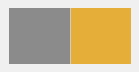

In [21]:
style.use('fivethirtyeight')

colors_gy=['#8B8B8B','#E5AE38']
fte_gy=sns.set_palette(sns.color_palette(colors_gy))
sns.palplot(sns.color_palette())

current_palette=sns.color_palette(colors_gy, n_colors=2)
cmap=ListedColormap(sns.color_palette(current_palette).as_hex())

In [22]:
## Number of Each Class in Dataset

<Figure size 720x432 with 0 Axes>

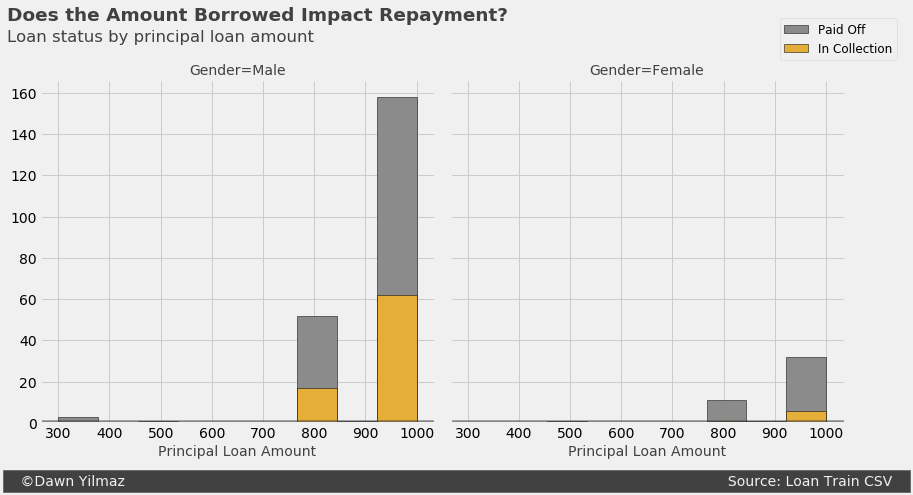

In [23]:
plt.figure(figsize=(10,6),dpi=72)
bins=np.linspace(df.principal.min(),df.principal.max(),10)
g=sns.FacetGrid(df,col="gender",hue="loan_status",palette=colors_gy,col_wrap=2,height=6,aspect=1)
g.map(plt.hist,'principal',bins=bins,ec="k")
axes=g.axes.flatten()
axes[0].set_title("Gender=Male",fontsize=14,color='#414141')
axes[1].set_title("Gender=Female",fontsize=14,color='#414141')
for ax in axes:
    ax.set_xlabel("Principal Loan Amount",fontsize=14,color='#414141')
g.axes[-1].legend(("Paid Off","In Collection"),loc='upper right',bbox_to_anchor=(1.15, 1.20),fontsize=12)
plt.text(x=-600,y=195,s='Does the Amount Borrowed Impact Repayment?',fontsize=18.5,fontweight='semibold',color='#414141')
plt.text(x=-600,y=185,s='Loan status by principal loan amount',fontsize=16.5,color='#414141')
plt.text(x=-600,y=-30,s='   ©Dawn Yilmaz                                                                                                                                      Source: Loan Train CSV   ',
    fontsize = 14,color='#f0f0f0',backgroundcolor='#414141')
axes[0].axhline(y=0,color='#414141',linewidth=5.5,alpha=.6)
axes[1].axhline(y=0,color='#414141',linewidth=5.5,alpha=.6)
plt.show()

<Figure size 720x432 with 0 Axes>

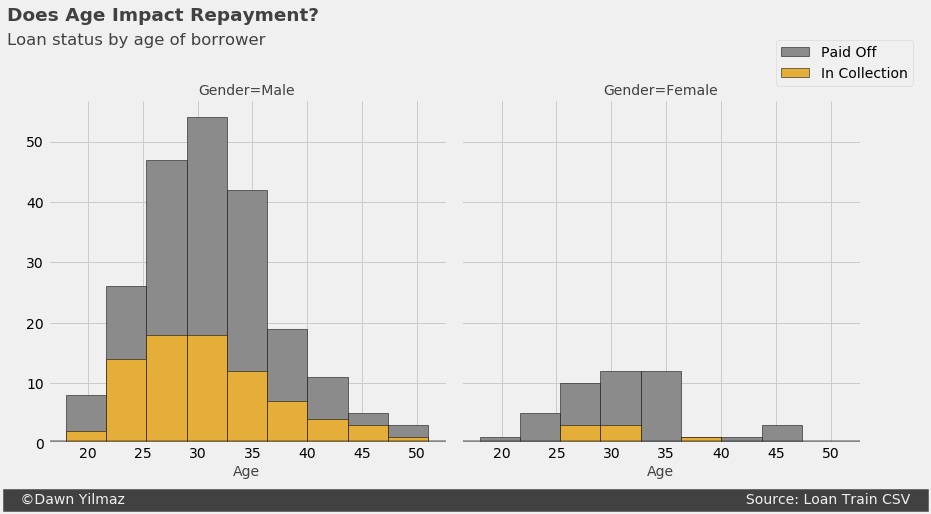

In [24]:
plt.figure(figsize=(10,6),dpi=72)
bins=np.linspace(df.age.min(),df.age.max(),10)
g = sns.FacetGrid(df,col="gender",hue="loan_status",palette=colors_gy,col_wrap=2,height=6,aspect=1)
g.map(plt.hist,'age',bins=bins,ec="k")
axes=g.axes.flatten()
axes[0].set_title("Gender=Male",fontsize=14,color='#414141')
axes[1].set_title("Gender=Female",fontsize=14,color='#414141')
for ax in axes:
    ax.set_xlabel("Age",fontsize=14,color='#414141')
g.axes[-1].legend(("Paid Off","In Collection"),loc='upper right',bbox_to_anchor=(1.15, 1.2))
plt.text(x=-25,y=70,s='Does Age Impact Repayment?',fontsize=18.5,fontweight='semibold',color='#414141')
plt.text(x=-25,y=66,s='Loan status by age of borrower',fontsize=16.5,color='#414141')
plt.text(x=-25,y=-10,s='   ©Dawn Yilmaz                                                                                                                                          Source: Loan Train CSV   ',
    fontsize = 14,color='#f0f0f0',backgroundcolor='#414141')
axes[0].axhline(y=0, color='#414141',linewidth=5.5,alpha=.6)
axes[1].axhline(y=0, color='#414141',linewidth=5.5,alpha=.6)
plt.show()

# Data Visualization & Pre-processing:  Feature selection/extraction

 Lets look at the day of the week people get the loan.

<Figure size 720x432 with 0 Axes>

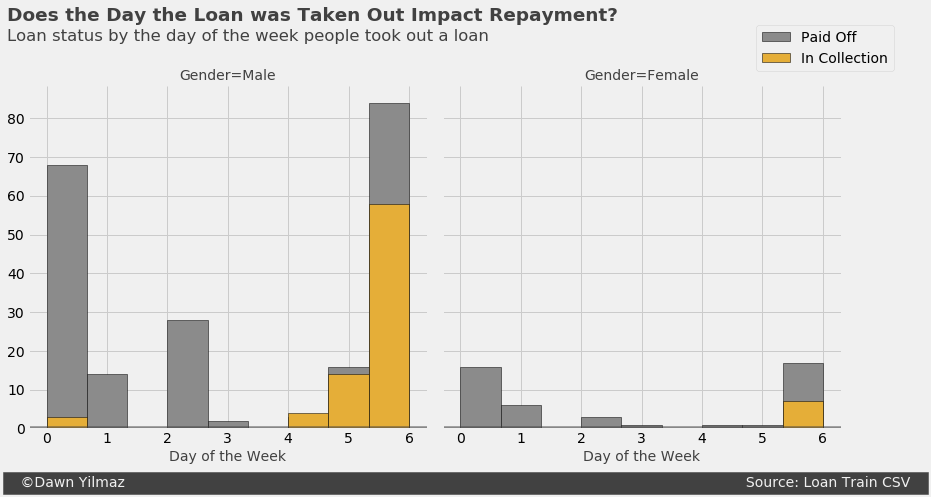

In [25]:
plt.figure(figsize=(10,6),dpi=72)
df['dayofweek']=df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(),df.dayofweek.max(), 10)
g=sns.FacetGrid(df,col="gender",hue="loan_status",palette=colors_gy,col_wrap=2,height=6,aspect=1)
g.map(plt.hist,'dayofweek',bins=bins,ec="k")
axes=g.axes.flatten()
axes[0].set_title("Gender=Male",fontsize=14,color='#414141')
axes[1].set_title("Gender=Female",fontsize=14,color='#414141')
for ax in axes:
    ax.set_xlabel("Day of the Week",fontsize=14,color='#414141')
g.axes[-1].legend(("Paid Off","In Collection"),loc='upper right',bbox_to_anchor=(1.15,1.2))
plt.text(x=-7.5,y=105,s='Does the Day the Loan was Taken Out Impact Repayment?',fontsize=18.5,fontweight='semibold',color='#414141')
plt.text(x=-7.5,y=100,s='Loan status by the day of the week people took out a loan',fontsize=16.5,color='#414141')
plt.text(x=-7.5,y=-15,s='   ©Dawn Yilmaz                                                                                                                                          Source: Loan Train CSV   ',
    fontsize = 14,color='#f0f0f0',backgroundcolor='#414141')
axes[0].axhline(y=0, color='#414141',linewidth=5.5,alpha=.6)
axes[1].axhline(y=0, color='#414141',linewidth=5.5,alpha=.6)
plt.show()

#### We see that people who get the loan at the end of the week typically don't pay it off.
## Feature Binarization (Threshold Values Less Then Day 4) 

In [26]:
df['weekend']=df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head(3)

,u0,u1,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,0,0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,male,3,0
1,2,2,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,female,3,0
2,3,3,paidoff,1000,15,2016-09-08,2016-09-22,27,college,male,3,0


## Convert Categorical Features to Numerical Values

Lets look at gender:

In [27]:
df.groupby(['gender'])['loan_status'].value_counts(normalize=True)

gender  loan_status
female  paidoff        0.865385
        collection     0.134615
male    paidoff        0.731293
        collection     0.268707
Name: loan_status, dtype: float64

#### Roughly 87% of female borrowers paid off their loans while only 73% of male borrowers paid off their loans.
Lets convert male to 0 and female to 1:

Lets convert male to 0 and female to 1:


In [28]:
df['gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df.head(3)

,u0,u1,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,0,0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,0,3,0
1,2,2,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,1,3,0
2,3,3,paidoff,1000,15,2016-09-08,2016-09-22,27,college,0,3,0


## One Hot Encoding  
#### How about Education?

In [29]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
bachelor              paidoff        0.750000
                      collection     0.250000
college               paidoff        0.765101
                      collection     0.234899
high school or below  paidoff        0.741722
                      collection     0.258278
master or above       collection     0.500000
                      paidoff        0.500000
Name: loan_status, dtype: float64

#### Feature Before One Hot Encoding

In [30]:
df[['principal','terms','age','gender','education']].head(3)

,principal,terms,age,gender,education
0,1000,30,45,0,high school or below
1,1000,30,33,1,bachelor
2,1000,15,27,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [31]:
Feature=df[['principal','terms','age','gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(['master or above'],axis=1,inplace=True)
Feature.head(3)

,principal,terms,age,gender,weekend,bachelor,college,high school or below
0,1000,30,45,0,0,0,0,1
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,1,0


### Feature Selection

Lets define feature sets, x:

In [32]:
x=Feature
x[0:5]

,principal,terms,age,gender,weekend,bachelor,college,high school or below
0,1000,30,45,0,0,0,0,1
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,1,0
3,1000,30,28,1,1,0,1,0
4,1000,30,29,0,1,0,1,0


What are our labels?

In [33]:
y=df['loan_status'].values
y[0:5]

array(['paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff'],
      dtype=object)

# Coorelations

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”

## Pearson Correlation & Heat Map

In [34]:
merge=pd.concat([x,df['loan_status']],axis=1,sort=False)
merge.head(3)

,principal,terms,age,gender,weekend,bachelor,college,high school or below,loan_status
0,1000,30,45,0,0,0,0,1,paidoff
1,1000,30,33,1,0,1,0,0,paidoff
2,1000,15,27,0,0,0,1,0,paidoff


In [35]:
correlations=merge.corr(method='pearson')
correlations

,principal,terms,age,gender,weekend,bachelor,college,high school or below
principal,1.000000,0.521876,-0.060893,-0.005134,0.089006,0.022212,-0.021506,0.011206
terms,0.521876,1.000000,-0.064762,-0.032399,0.084842,-0.057337,-0.052172,0.101787
age,-0.060893,-0.064762,1.000000,-0.010519,0.000431,0.057065,-0.131585,0.066836
gender,-0.005134,-0.032399,-0.010519,1.000000,-0.079157,0.082229,-0.006420,-0.043927
weekend,0.089006,0.084842,0.000431,-0.079157,1.000000,0.016430,0.044184,-0.064819
bachelor,0.022212,-0.057337,0.057065,0.082229,0.016430,1.000000,-0.331958,-0.335888
college,-0.021506,-0.052172,-0.131585,-0.006420,0.044184,-0.331958,1.000000,-0.765299
high school or below,0.011206,0.101787,0.066836,-0.043927,-0.064819,-0.335888,-0.765299,1.000000


In [36]:
# Print the most negative correlations
print(correlations.head(3),'\n')

# Print the most positive correlations
print(correlations.tail(3))

           principal     terms       age    gender   weekend  bachelor  \
principal   1.000000  0.521876 -0.060893 -0.005134  0.089006  0.022212   
terms       0.521876  1.000000 -0.064762 -0.032399  0.084842 -0.057337   
age        -0.060893 -0.064762  1.000000 -0.010519  0.000431  0.057065   

            college  high school or below  
principal -0.021506              0.011206  
terms     -0.052172              0.101787  
age       -0.131585              0.066836   

                      principal     terms       age    gender   weekend  \
bachelor               0.022212 -0.057337  0.057065  0.082229  0.016430   
college               -0.021506 -0.052172 -0.131585 -0.006420  0.044184   
high school or below   0.011206  0.101787  0.066836 -0.043927 -0.064819   

                      bachelor   college  high school or below  
bachelor              1.000000 -0.331958             -0.335888  
college              -0.331958  1.000000             -0.765299  
high school or below -0.33588

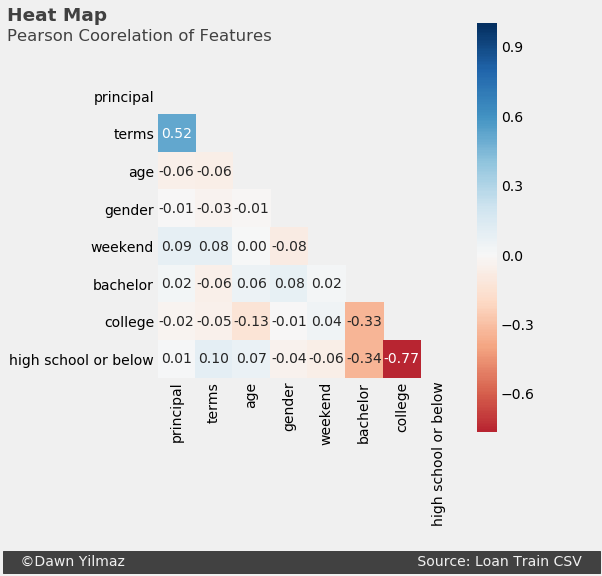

In [37]:
fig,ax=plt.subplots(figsize=(6,7),dpi=72)
mask=np.zeros_like(correlations)
mask[np.triu_indices_from(mask)]=True
heatmap=sns.heatmap(correlations,mask=mask,annot=True,fmt=".2f",cmap="RdBu",center=0,ax=ax,square=True,xticklabels=1,yticklabels=1)
sns.set(rc={'axes.facecolor':'white','figure.facecolor':'#F0F0F0'})
plt.text(x=-4,y=-1.5,s='Heat Map',fontsize=18.5,fontweight='semibold',color='#414141')
plt.text(x=-4,y=-.965,s='Pearson Coorelation of Features',fontsize=16.5,color='#414141')
plt.text(x=-4,y=13,s='   ©Dawn Yilmaz                                                                 Source: Loan Train CSV   ',fontsize=14,color='#f0f0f0',backgroundcolor='#414141')
plt.show()

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [38]:
X=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062, -0.86968108,  1.13639374],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.86968108, -0.87997669],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062,  1.14984679, -0.87997669],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062,  1.14984679, -0.87997669],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062,  1.14984679, -0.87997669]])

# Classification 

Now, we will use the training set and the following algorithms to build an accurate model. Then use the test set to report the accuracy of the model.

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)
Find the best k to build the model with the best accuracy.  
**Warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

## Split & Train Data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print ('TRAIN SET:','X_train =',X_train.shape,'y_train =',y_train.shape)
print ('TEST SET:','X_test =', X_test.shape,'y_test =', y_test.shape)
print("--------------------------------------------------")
print(X_train[0:5])
print(y_train[0:5])

TRAIN SET: X_train = (276, 8) y_train = (276,)
TEST SET: X_test = (70, 8) y_test = (70,)
--------------------------------------------------
[[ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.38170062
   1.14984679 -0.87997669]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
  -0.86968108  1.13639374]
 [ 0.51578458  0.92071769  0.01006414 -0.42056004 -1.20577805 -0.38170062
   1.14984679 -0.87997669]
 [ 0.51578458 -0.95911111 -0.98484789 -0.42056004  0.82934003 -0.38170062
   1.14984679 -0.87997669]
 [ 0.51578458  0.92071769 -0.48739188 -0.42056004 -1.20577805 -0.38170062
   1.14984679 -0.87997669]]
['paidoff' 'collection' 'paidoff' 'paidoff' 'paidoff']


## Modeling & Prediction

In [40]:
from sklearn.neighbors import KNeighborsClassifier

k=3
KNN=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [41]:
yhat=KNN.predict(X_test)
yhat[0:5]

array(['paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff'],
      dtype=object)

In [42]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range (1,Ks):
    KNN=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=KNN.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       ])

In [43]:
from sklearn.neighbors import KNeighborsClassifier

k=7
KNN=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

## Plot: KNN Model Accuracy
Plot of the relationship between k and testing accuracy.

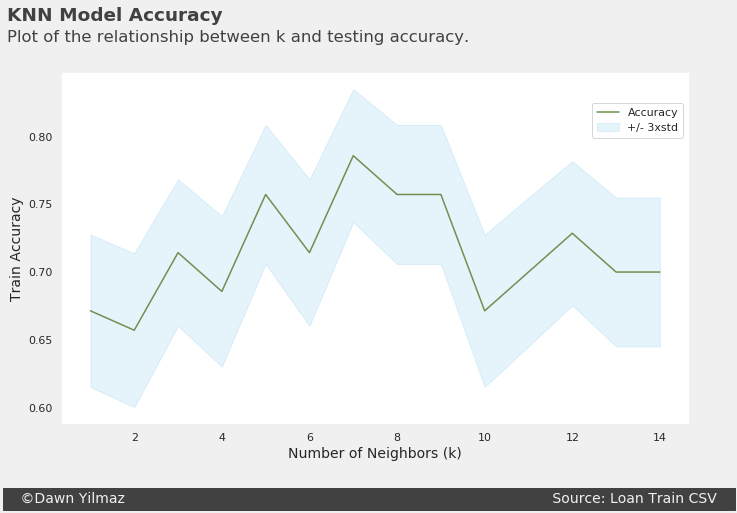

In [44]:
plt.figure(figsize=(10,6),dpi=72)
plt.text(x=-.9,y=.885,s='KNN Model Accuracy',fontsize=18.5,fontweight='semibold',color='#414141')
plt.text(x=-.9,y=.870,s='Plot of the relationship between k and testing accuracy.',fontsize=16.5,color='#414141')
plt.plot(range(1,Ks),mean_acc,'#6D904F')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10,color='#008FD5')
plt.legend(('Accuracy','+/- 3xstd'),loc='upper right',bbox_to_anchor=(1,.93))
plt.ylabel('Train Accuracy',fontsize=14)
plt.xlabel('Number of Neighbors (k)',fontsize=14)
plt.text(x=-.9,y=0.53,s='   ©Dawn Yilmaz                                                                                               Source: Loan Train CSV   ',
    fontsize = 14,color='#f0f0f0',backgroundcolor='#414141')
plt.show()

## Classification Report

In [45]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  collection       0.31      0.33      0.32        15
     paidoff       0.81      0.80      0.81        55

   micro avg       0.70      0.70      0.70        70
   macro avg       0.56      0.57      0.56        70
weighted avg       0.71      0.70      0.70        70



# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion="entropy",max_depth=4)
DT.fit(X_train,y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
yhat=DT.predict(X_test)
yhat

array(['collection', 'collection', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'collection',
       'paidoff', 'collection', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'collection', 'paidoff', 'collection', 'paidoff',
       'paidoff', 'collection', 'collection', 'collection', 'paidoff',
       'collection', 'collection', 'paidoff', 'collection', 'paidoff',
       'collection', 'collection', 'collection', 'paidoff', 'paidoff',
       'paidoff', 'collection', 'paidoff', 'collection', 'paidoff',
       'collection', 'paidoff', 'paidoff', 'collection', 'paidoff',
       'collection', 'collection', 'collection', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'collection', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'collection', 'paidoff', 'collection',
       'paidoff', 'collection', 'paidoff', 'paidoff'], dtype=object)

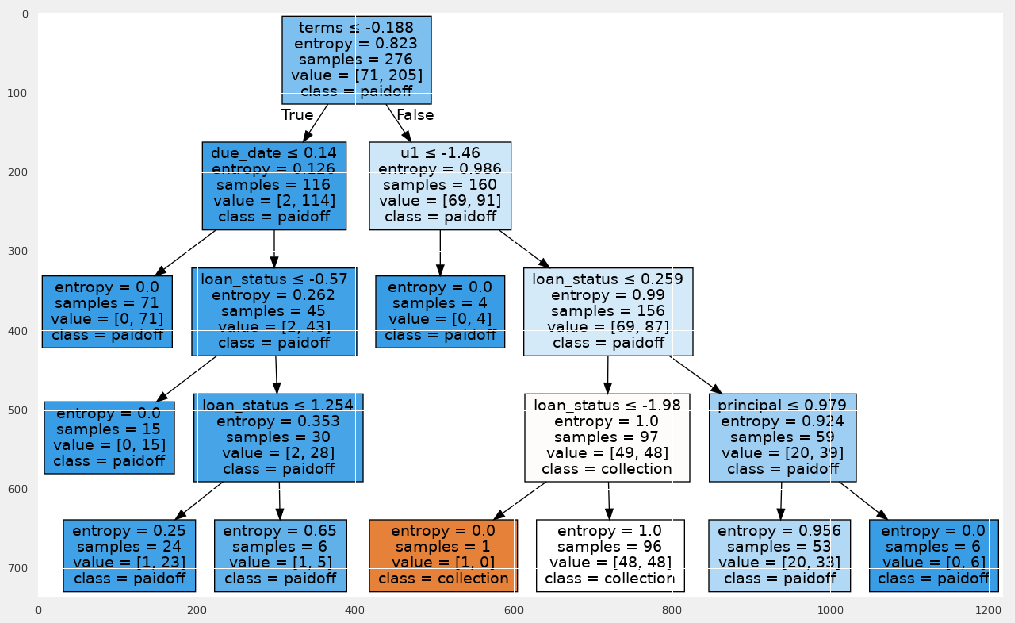

In [48]:
dot_data=io.StringIO()
filename="DT.png"
featureNames=df.columns[0:8]
targetNames=df["loan_status"].unique().tolist()
out=tree.export_graphviz(DT,feature_names=featureNames,out_file=dot_data,class_names=np.unique(y_train),filled=True,special_characters=True,rotate=False)  
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(25,10),dpi=72)
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [49]:
from sklearn import svm
SVM=svm.SVC(gamma='scale')
SVM.fit(X_train,y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## SVM: Best Kernal Function

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


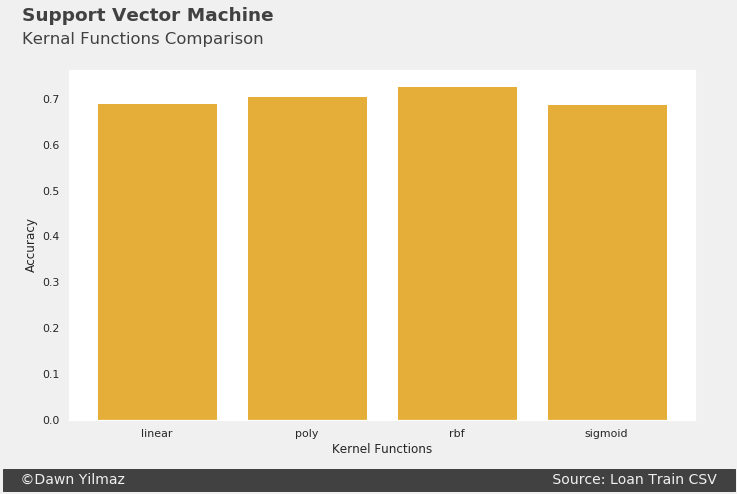

In [50]:
func_list=['linear','poly','rbf','sigmoid']
accuracy_score=[]

for func in func_list:
    SVM=svm.SVC(gamma='scale',kernel=func)
    SVM.fit(X_train,y_train)
    SVM_yhat=SVM.predict(X_test)
    accuracy_score.append(f1_score(y_test,SVM_yhat,average='weighted'))

# plot the comparison among 4 kernel functions
y_pos=np.arange(len(func_list))
plt.figure(figsize=(10,6),dpi=72)
plt.bar(y_pos,accuracy_score,align='center',color='#E5AE38')
plt.xticks(y_pos,func_list)
plt.ylabel('Accuracy')
plt.xlabel('Kernel Functions')
plt.text(x=-.9,y=.87,s='Support Vector Machine',fontsize=18.5,fontweight='semibold',color='#414141')
plt.text(x=-.9,y=.82,s='Kernal Functions Comparison',fontsize=16.5,color='#414141')
plt.text(x=-1,y=-.14,s='   ©Dawn Yilmaz                                                                                               Source: Loan Train CSV   ',
    fontsize = 14,color='#f0f0f0',backgroundcolor='#414141')
plt.show()

## Confusion Matrix

In [51]:
from sklearn.svm import SVC

SVM=svm.SVC(kernel='rbf',gamma='scale')
SVM.fit(X_train,y_train)

yhat=SVM.predict(X_test)
yhat[0:5]

array(['collection', 'paidoff', 'paidoff', 'paidoff', 'paidoff'],
      dtype=object)

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


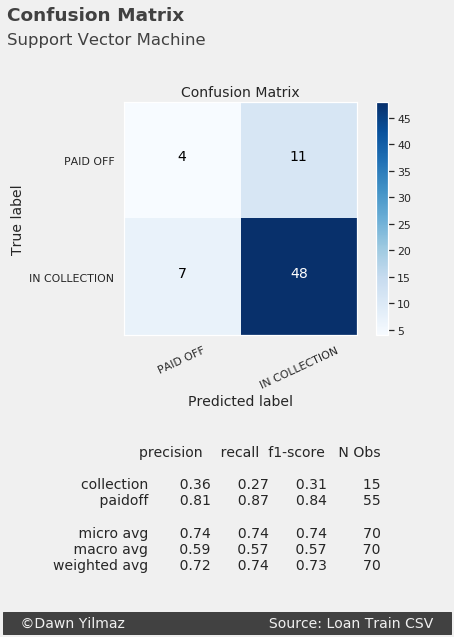

<Figure size 432x504 with 0 Axes>

In [52]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
        
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=25)
    plt.yticks(tick_marks,classes)
    plt.ylabel('True label',fontsize=14)
    plt.xlabel('Predicted label',fontsize=14)
    plt.grid(None)

    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max() / 2 
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black",
                 fontsize=14)

    rpt=classification_report(y_test,yhat)
    rpt=rpt.replace('avg / total','      avg')
    rpt=rpt.replace('support','N Obs')

    plt.annotate(rpt, 
                 xy=(1.1,0), 
                 xytext=(0,-250), 
                 xycoords='axes fraction',textcoords='offset points',
                 fontsize=14,ha='right')   
    
           
cnf_matrix=confusion_matrix(y_test,yhat)
np.set_printoptions(precision=2)

classification_report(y_test,yhat)

plot_confusion_matrix(cnf_matrix,classes=['PAID OFF','IN COLLECTION'],normalize=False)
plt.text(x=-1.5,y=-1.2,s='Confusion Matrix',fontsize=18.5,fontweight='semibold',color='#414141')
plt.text(x=-1.5,y=-1,s='Support Vector Machine',fontsize=16.5,color='#414141')
plt.text(x=-1.5,y=4,s='   ©Dawn Yilmaz                                Source: Loan Train CSV   ',fontsize=14,color='#f0f0f0',backgroundcolor='#414141')
plt.figure(figsize=(6,7),dpi=72)
plt.tight_layout()
plt.show()

In [53]:
SVM=svm.SVC(kernel='rbf',gamma='scale')
SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
yhat=SVM.predict(X_test)
yhat

array(['collection', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'collection', 'collection', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'collection', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'collection', 'collection', 'paidoff', 'collection',
       'collection', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'collection', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'collection', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'collection',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff'],
      dtype=object)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01).fit(X_train,y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
yhat=LR.predict(X_test)
yhat

array(['collection', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'collection', 'paidoff', 'collection', 'paidoff', 'paidoff',
       'paidoff', 'collection', 'paidoff', 'paidoff', 'collection',
       'collection', 'paidoff', 'collection', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'collection', 'paidoff', 'paidoff', 'paidoff', 'collection',
       'paidoff', 'paidoff', 'collection', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'collection', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff'], dtype=object)

# Model Evaluation using Test set

In [57]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### First, download and load the test set:

In [58]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-01-29 04:33:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-01-29 04:33:28 (420 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [59]:
test_df=pd.read_csv('loan_test.csv')
test_df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female


### Load Test Set for Evaluation 

In [60]:
test_df=pd.read_csv('loan_test.csv')

#Spelling corrections and lowercase formatting
test_df=test_df.rename(columns={"Unnamed: 0":"u0","Unnamed: 0.1":"u1","Principal":"principal","Gender":"gender"})
test_df['education']=test_df['education'].str.replace('Bechalor','bachelor')
test_df['loan_status']=test_df['loan_status'].replace('paidoff','paid off')
test_df['education']=test_df['education'].str.lower()
test_df['loan_status']=test_df['loan_status'].str.lower()

#Convert datetime formatting
test_df['due_date']=pd.to_datetime(test_df['due_date'])
test_df['effective_date']=pd.to_datetime(test_df['effective_date'])

#Pre-processing and feature binarization
test_df['dayofweek']=test_df['effective_date'].dt.dayofweek
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#Catagorical features to numerical values
test_df['gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

#Feature before one hot encoding
test_df[['principal','terms','age','gender','education']]

#One hot encoding
test_Feature=test_df[['principal','terms','age','gender','weekend']]
test_Feature=pd.concat([test_Feature,pd.get_dummies(test_df['education'])],axis=1)
test_Feature.drop(['master or above'],axis=1,inplace=True)

#Feature selection and normalization
test_X_loan=test_Feature
test_X_loan=preprocessing.StandardScaler().fit(test_X_loan).transform(test_X_loan)

print(test_X_loan[0:5])

[[ 0.49  0.93  3.06  1.98 -1.3   2.4  -0.86 -0.8 ]
 [-3.56 -1.7   0.53 -0.51  0.77 -0.42 -0.86 -0.8 ]
 [ 0.49  0.93  1.88  1.98  0.77 -0.42 -0.86  1.25]
 [ 0.49  0.93 -0.98 -0.51  0.77 -0.42  1.16 -0.8 ]
 [-0.67 -0.79 -0.48 -0.51  0.77  2.4  -0.86 -0.8 ]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:31: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [61]:
#Set labels
test_y_loan=test_df['loan_status'].values
print (test_y_loan[0:5])

['paidoff' 'paidoff' 'paidoff' 'paidoff' 'paidoff']


## Evaluation of Results

### Jaccard Score

In [62]:
# evaluate KNN
KNN_yhat=KNN.predict(test_X_loan)
js1=round(jaccard_similarity_score(test_y_loan,KNN_yhat),2)
print("KNN Model Jaccard Index: %.2f" % js1)

# evaluate Decision Trees
DT_yhat=DT.predict(test_X_loan)
js2=round(jaccard_similarity_score(test_y_loan,DT_yhat),2)
print("DT Model Jaccard Index: %.2f" % js2)
      
#evaluate SVM
SVM_yhat=SVM.predict(test_X_loan)
js3=round(jaccard_similarity_score(test_y_loan,SVM_yhat),2)
print("SVM Model Jaccard Index: %.2f" % js3)
      
# evaluate Logistic Regression
LR_yhat=LR.predict(test_X_loan)
js4=round(jaccard_similarity_score(test_y_loan,LR_yhat),2)
print("LR Model Jaccard Index: %.2f" %js4)

list_js=[js1,js2,js3,js4]

KNN Model Jaccard Index: 0.67
DT Model Jaccard Index: 0.72
SVM Model Jaccard Index: 0.80
LR Model Jaccard Index: 0.74


### F1 Score

In [63]:
#Evaluate KNN
fs1=round(f1_score(test_y_loan,KNN_yhat,average='weighted'),2)
print("KNN F1-score: %.2f" % fs1)
      
#Evaluate Desision Trees 
fs2=round(f1_score(test_y_loan,DT_yhat,average='weighted'),2)
print("DT F1-score: %.2f" % fs2)
      
#Evaluate SVM
fs3=round(f1_score(test_y_loan,SVM_yhat,average='weighted'),2)
print("SVM F1-score: %.2f" % fs3)    

#Evaluate Logistic Regression
fs4=round(f1_score(test_y_loan,LR_yhat,average='weighted'),2)
print("LR F1-score: %.2f" % fs4)  

list_fs=[fs1,fs2,fs3,fs4]

KNN F1-score: 0.63
DT F1-score: 0.74
SVM F1-score: 0.76
LR F1-score: 0.66


### LogLoss Score

In [64]:
LR_prob=LR.predict_proba(test_X_loan)
lr4=round(log_loss(test_y_loan,LR_prob),2)
print("LR LogLoss: %.2f" % lr4)

list_ll=['NA','NA','NA',lr4]


LR LogLoss: 0.57


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [65]:
df=pd.DataFrame(list_js, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns=['Jaccard']
df.insert(loc=1,column='F1-score',value=list_fs)
df.insert(loc=2,column='LogLoss',value=list_ll)
df.columns.name='Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.67,0.63,NA
Decision Tree,0.72,0.74,NA
SVM,0.80,0.76,NA
Logistic Regression,0.74,0.66,0.57


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>